<b>
   Problem 1

<b>1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline 

In [95]:
df1 = pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0',axis=1)

In [96]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [97]:
df1.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


We do not notice any null values<br> There are 3 object columns. 

In [99]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


X, Y and Z are dimentions and it cannot be 0

In [100]:
dup=df1.duplicated()
print('Number of duplicate rows', dup.sum())

Number of duplicate rows 34


In [101]:
df1.drop_duplicates(inplace=True)

In [102]:
dup=df1.duplicated()
dup.sum()

0

There are 34 duplicate values. Duplicate values are dropped.

In [103]:
for i in df1.columns:
    print('Column',i)
    print(df1[i].unique())
    print('\n')

Column carat
[0.3  0.33 0.9  0.42 0.31 1.02 1.01 0.5  1.21 0.35 0.32 1.1  0.71 1.5
 0.34 0.54 1.04 0.4  1.52 1.19 0.66 0.52 0.72 0.77 0.51 1.26 1.55 1.58
 0.43 2.   0.73 1.14 0.78 0.91 0.27 1.8  1.13 0.38 0.57 0.44 0.7  1.22
 0.59 1.2  2.16 1.68 0.76 0.74 0.41 1.51 1.69 1.3  1.   0.28 0.55 1.39
 0.36 0.23 1.37 0.81 2.02 2.8  1.56 2.2  0.75 1.71 1.11 0.92 1.45 1.16
 0.58 0.97 1.03 0.26 1.53 1.63 0.96 1.24 0.39 0.61 0.24 2.01 1.7  0.79
 0.67 1.28 0.25 0.56 1.09 2.11 1.17 0.82 0.53 0.46 2.43 1.65 0.84 1.74
 0.8  1.83 1.25 1.15 0.6  1.06 0.29 1.05 1.18 2.27 2.36 1.07 0.95 0.93
 2.48 1.23 2.03 1.27 0.83 1.43 0.45 1.12 1.59 0.62 1.61 2.04 1.33 0.37
 1.35 1.6  3.04 1.57 2.14 0.94 0.49 1.49 1.76 2.1  1.78 1.34 1.38 2.33
 2.51 2.05 0.87 1.79 1.73 0.69 1.32 1.86 2.61 1.72 1.66 3.01 0.63 2.06
 2.29 1.47 1.08 0.86 0.68 1.31 1.41 0.65 1.54 1.91 2.22 1.29 2.49 0.98
 1.44 0.64 1.87 0.47 2.56 2.28 1.9  1.67 2.45 1.82 1.64 0.48 2.39 2.21
 2.24 2.25 1.99 1.75 2.44 2.09 1.36 0.88 2.07 1.62 0.85 2.35 1.48

Column depth has 'nan' value

In [104]:
df1['depth'].fillna(df1['depth'].mean(), inplace=True)

In [105]:
for i in df1.columns:
    print('Column',i)
    print(df1[i].unique())
    print('\n')

Column carat
[0.3  0.33 0.9  0.42 0.31 1.02 1.01 0.5  1.21 0.35 0.32 1.1  0.71 1.5
 0.34 0.54 1.04 0.4  1.52 1.19 0.66 0.52 0.72 0.77 0.51 1.26 1.55 1.58
 0.43 2.   0.73 1.14 0.78 0.91 0.27 1.8  1.13 0.38 0.57 0.44 0.7  1.22
 0.59 1.2  2.16 1.68 0.76 0.74 0.41 1.51 1.69 1.3  1.   0.28 0.55 1.39
 0.36 0.23 1.37 0.81 2.02 2.8  1.56 2.2  0.75 1.71 1.11 0.92 1.45 1.16
 0.58 0.97 1.03 0.26 1.53 1.63 0.96 1.24 0.39 0.61 0.24 2.01 1.7  0.79
 0.67 1.28 0.25 0.56 1.09 2.11 1.17 0.82 0.53 0.46 2.43 1.65 0.84 1.74
 0.8  1.83 1.25 1.15 0.6  1.06 0.29 1.05 1.18 2.27 2.36 1.07 0.95 0.93
 2.48 1.23 2.03 1.27 0.83 1.43 0.45 1.12 1.59 0.62 1.61 2.04 1.33 0.37
 1.35 1.6  3.04 1.57 2.14 0.94 0.49 1.49 1.76 2.1  1.78 1.34 1.38 2.33
 2.51 2.05 0.87 1.79 1.73 0.69 1.32 1.86 2.61 1.72 1.66 3.01 0.63 2.06
 2.29 1.47 1.08 0.86 0.68 1.31 1.41 0.65 1.54 1.91 2.22 1.29 2.49 0.98
 1.44 0.64 1.87 0.47 2.56 2.28 1.9  1.67 2.45 1.82 1.64 0.48 2.39 2.21
 2.24 2.25 1.99 1.75 2.44 2.09 1.36 0.88 2.07 1.62 0.85 2.35 1.48

In [106]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.745285,1.393848,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


In [107]:
data_num = df1.drop(['cut','color','clarity'], axis=1)

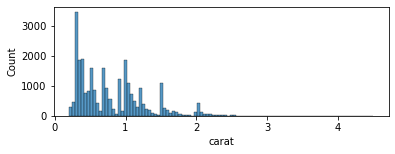

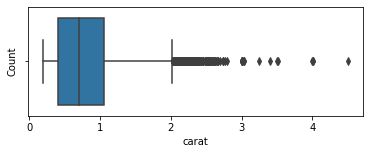

---------------------------------------------------------------------------------------------------


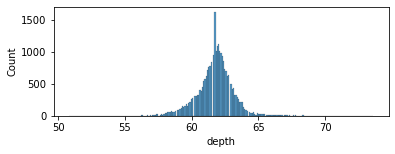

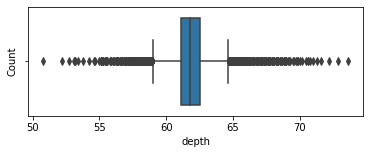

---------------------------------------------------------------------------------------------------


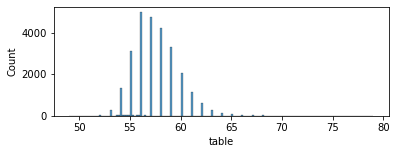

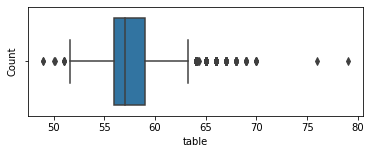

---------------------------------------------------------------------------------------------------


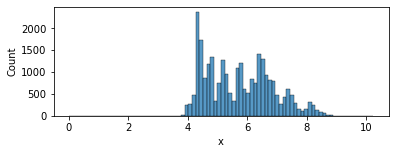

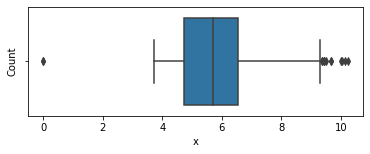

---------------------------------------------------------------------------------------------------


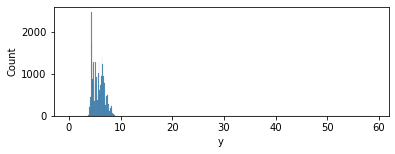

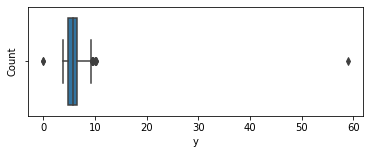

---------------------------------------------------------------------------------------------------


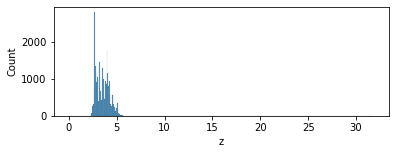

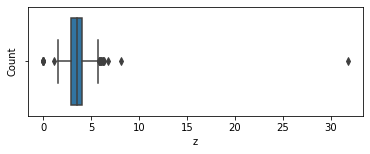

---------------------------------------------------------------------------------------------------


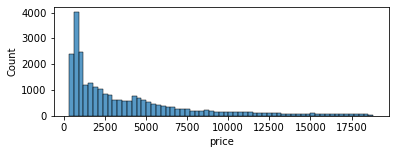

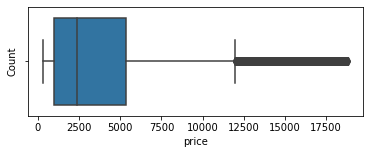

---------------------------------------------------------------------------------------------------


In [108]:
for i in data_num.columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data_num[i])
    plt.show()
    plt.figure(figsize=(6,2))
    sns.boxplot(x=i, data=data_num)
    plt.ylabel('Count')
    plt.show()
    print('---------------------------------------------------------------------------------------------------')

Outliers are present in most of the columns

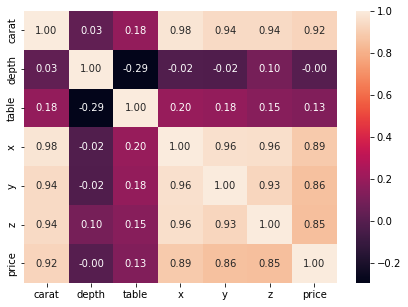

In [109]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),annot=True,fmt='.2f')
plt.show()

There is strong correlation between:<br>
    1. Carat and x,y,z and price<br>
    2. x,y and z are highly correlated with each other<br>
    3. Price with x,y and z<br>
We can notice multicollinearity which violates assumption of Linear Regression.    

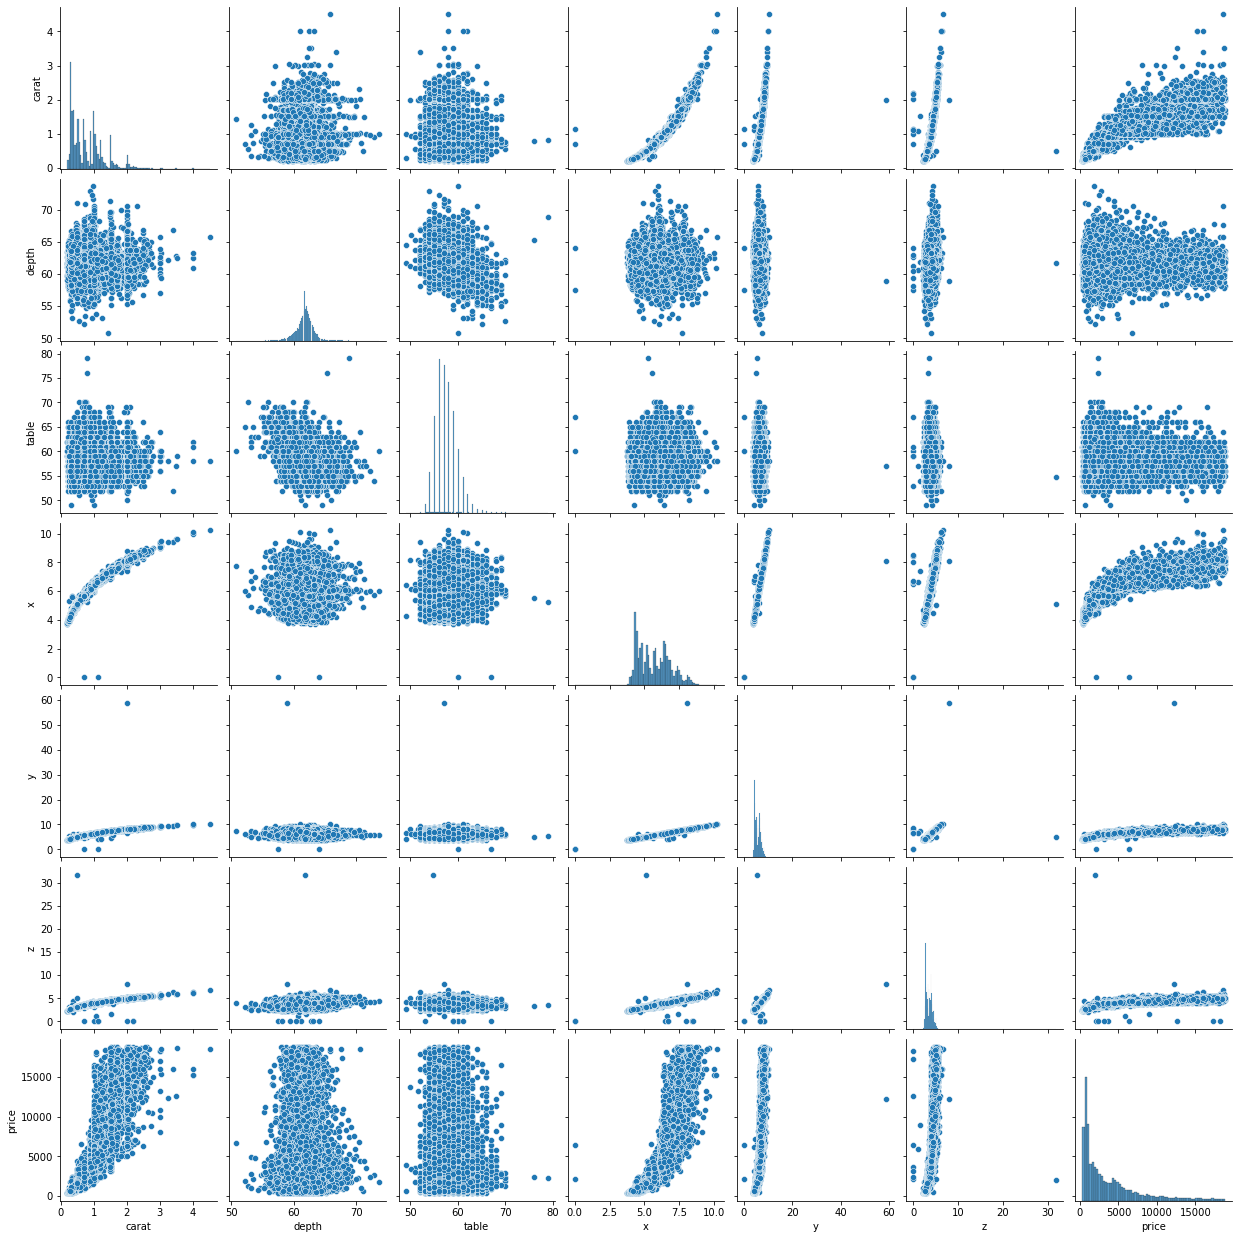

In [110]:
sns.pairplot(df1);
plt.savefig('Pairplot1.jpeg')  

In [111]:
data_cat = df1.select_dtypes(['object'])

In [112]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64


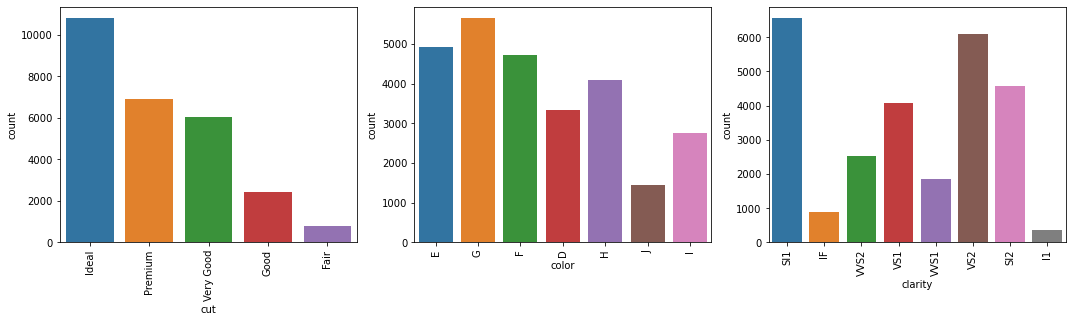

In [113]:
fig=plt.figure(figsize=(15,8))
for i in range(0,len(data_cat.columns)):
    fig.add_subplot(2,3,i+1)
    sns.countplot(x=data_cat.columns[i], data=data_cat); 
    plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

<b>1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [114]:
df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no null values in the dataset

x, y and z are the dimensions of cubic zirconia. <br>Value of length cannot be 0.<br>Hence those values can be dropped since we have less number of such rows.

In [115]:
df1[df1['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [116]:
df1.drop(df1[df1['x']==0].index,inplace=True)

In [117]:
df1[df1['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [118]:
df1[df1['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [119]:
df1.drop(df1[df1['z']==0].index,inplace=True)

In [120]:
df1[df1['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [121]:
df1[df1['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [122]:
df1[df1['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [123]:
df1['cut'].value_counts()

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [124]:
df1['cut']=np.where(df1['cut'] =='Good', 'Good', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Fair', 'Good', df1['cut'])

df1['cut']=np.where(df1['cut'] =='Premium', 'Premium', df1['cut'])
df1['cut']=np.where(df1['cut'] =='Very Good', 'Premium', df1['cut'])

In [125]:
df1['cut'].value_counts()

Premium    12907
Ideal      10805
Good        3213
Name: cut, dtype: int64

In [126]:
df1['color'].value_counts()

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [127]:
df1['color']=np.where(df1['color'] =='D', 'Colourless', df1['color'])
df1['color']=np.where(df1['color'] =='E', 'Colourless', df1['color'])
df1['color']=np.where(df1['color'] =='F', 'Colourless', df1['color'])

df1['color']=np.where(df1['color'] =='G', 'Near_colourless', df1['color'])
df1['color']=np.where(df1['color'] =='H', 'Near_colourless', df1['color'])
df1['color']=np.where(df1['color'] =='I', 'Near_colourless', df1['color'])
df1['color']=np.where(df1['color'] =='J', 'Near_colourless', df1['color'])

In [128]:
df1['color'].value_counts()

Near_colourless    13946
Colourless         12979
Name: color, dtype: int64

In [129]:
df1['clarity'].value_counts()

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [130]:
df1['clarity']=np.where(df1['clarity'] =='IF', 'Best_Clarity', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS1', 'Best_Clarity', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VVS2', 'Best_Clarity', df1['clarity'])

df1['clarity']=np.where(df1['clarity'] =='VS1', 'Good_Clarity', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='VS2', 'Good_Clarity', df1['clarity'])

df1['clarity']=np.where(df1['clarity'] =='SI1', 'Average_Clarity', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='SI2', 'Average_Clarity', df1['clarity'])
df1['clarity']=np.where(df1['clarity'] =='I1', 'Average_Clarity', df1['clarity'])

In [131]:
df1['clarity'].value_counts()

Average_Clarity    11487
Good_Clarity       10178
Best_Clarity        5260
Name: clarity, dtype: int64

In [132]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,Colourless,Average_Clarity,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,Near_colourless,Best_Clarity,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Premium,Colourless,Best_Clarity,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,Colourless,Good_Clarity,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,Colourless,Best_Clarity,60.4,59.0,4.35,4.43,2.65,779


<b>1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [133]:
import statsmodels.api as sm

In [134]:
df1 = pd.get_dummies(df1, columns=['cut','color','clarity'],drop_first=True)
df1.head()

,carat,depth,table,x,y,z,price,cut_Ideal,cut_Premium,color_Near_colourless,clarity_Best_Clarity,clarity_Good_Clarity
0,0.30,62.1,58.0,4.27,4.29,2.66,499,1,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984,0,1,1,1,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289,0,1,0,1,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082,1,0,0,0,1
4,0.31,60.4,59.0,4.35,4.43,2.65,779,1,0,0,1,0


In [135]:
x=df1.drop('price',axis=1)
y=df1['price']

In [136]:
x = sm.add_constant(x)

C:\Users\Shwetha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

<b>Scikit learn model

In [139]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [140]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for const is 0.0
The coefficient for carat is 10759.48733501821
The coefficient for depth is -100.12942145582855
The coefficient for table is -46.915741557087244
The coefficient for x is -943.2447230186496
The coefficient for y is 8.593794800598845
The coefficient for z is -40.27206771557986
The coefficient for cut_Ideal is 416.07765401879146
The coefficient for cut_Premium is 329.6602309741474
The coefficient for color_Near_colourless is -776.599036947426
The coefficient for clarity_Best_Clarity is 1838.6196723065304
The coefficient for clarity_Good_Clarity is 1173.267813303194


In [141]:
print("The intercept for our model is",round(regression_model.intercept_,5))
print('R square on training data ',round(regression_model.score(X_train, y_train),5))
print('R square on testing data ',round(regression_model.score(X_test, y_test),5))
print('Adjusted R square on training data',round((1-(1-regression_model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)),5))
print('Adjusted R square on testing data',round((1-(1-regression_model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),5))
print('RMSE on training data',round(np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))),5))
print('RMSE on testing data',round(np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))),5))

The intercept for our model is 9003.50901
R square on training data  0.89508
R square on testing data  0.89672
Adjusted R square on training data 0.89501
Adjusted R square on testing data 0.89657
RMSE on training data 1298.2575
RMSE on testing data 1301.77451


<b>Statsmodel

In [142]:
import statsmodels.api as sm

In [143]:
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

C:\Users\Shwetha\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [144]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [145]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:07   Log-Likelihood:            -1.6185e+05
No. Observations:               18847   AIC:                         3.237e+05
Df Residuals:                   18835   BIC:                         3.238e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9003.50

<b>Multicollinearity check

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                    6496.305442
carat                      25.053461
depth                       1.526905
table                       1.755192
x                          41.577989
y                          10.113809
z                          11.616257
cut_Ideal                   3.792319
cut_Premium                 2.932618
color_Near_colourless       1.078386
clarity_Best_Clarity        1.395713
clarity_Good_Clarity        1.251382
dtype: float64



x, carat, y, z have multicollinearity.

In [147]:
X_train2 = X_train.drop(["x"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print('By dropping x')
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)
print('\n')

X_train3 = X_train.drop(["carat"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train3)
olsres_3 = olsmod_3.fit()
print('By dropping carat')
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)
print('\n')


X_train4 = X_train.drop(["z"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train4)
olsres_4 = olsmod_4.fit()
print('By dropping z')
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)
print('\n')


X_train5 = X_train.drop(["y"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train5)
olsres_5 = olsmod_5.fit()
print('By dropping y')
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)
print('\n')


By dropping x
R-squared: 0.893 
Adjusted R-squared: 0.893


By dropping carat
R-squared: 0.83 
Adjusted R-squared: 0.83


By dropping z
R-squared: 0.895 
Adjusted R-squared: 0.895


By dropping y
R-squared: 0.895 
Adjusted R-squared: 0.895




In [148]:
X_train = X_train.drop(["y"], axis=1)

In [149]:
olsmod_6 = sm.OLS(y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.607e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:10   Log-Likelihood:            -1.6185e+05
No. Observations:               18847   AIC:                         3.237e+05
Df Residuals:                   18836   BIC:                         3.238e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9020.78

In [150]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                    6466.920249
carat                      25.034869
depth                       1.518789
table                       1.753863
x                          35.314281
z                          11.451878
cut_Ideal                   3.791915
cut_Premium                 2.932412
color_Near_colourless       1.078385
clarity_Best_Clarity        1.395686
clarity_Good_Clarity        1.251374
dtype: float64



In [151]:
X_train7 = X_train.drop(["carat"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train7)
olsres_7 = olsmod_7.fit()
print('By dropping Carat')
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)
print('\n')

X_train8 = X_train.drop(["z"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train8)
olsres_8 = olsmod_8.fit()
print('By dropping z')
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)
print('\n')

X_train9 = X_train.drop(["x"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train9)
olsres_9 = olsmod_9.fit()
print('By dropping x')
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)
print('\n')

By dropping Carat
R-squared: 0.83 
Adjusted R-squared: 0.83


By dropping z
R-squared: 0.895 
Adjusted R-squared: 0.895


By dropping x
R-squared: 0.893 
Adjusted R-squared: 0.893




In [152]:
X_train = X_train.drop(["z"], axis=1)

In [153]:
olsmod_10 = sm.OLS(y_train, X_train)
olsres_10 = olsmod_10.fit()
print(olsres_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 1.785e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:15   Log-Likelihood:            -1.6185e+05
No. Observations:               18847   AIC:                         3.237e+05
Df Residuals:                   18837   BIC:                         3.238e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9146.03

In [154]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

const                    6235.314749
carat                      25.029400
depth                       1.380655
table                       1.752681
x                          25.363985
cut_Ideal                   3.791505
cut_Premium                 2.932409
color_Near_colourless       1.078307
clarity_Best_Clarity        1.395652
clarity_Good_Clarity        1.251223
dtype: float64



In [155]:
X_train11 = X_train.drop(["carat"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train11)
olsres_11 = olsmod_11.fit()
print('By dropping carat')
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)
print('\n')

X_train12 = X_train.drop(["x"], axis=1)
olsmod_12 = sm.OLS(y_train, X_train12)
olsres_12 = olsmod_12.fit()
print('By dropping x')
print(
    "R-squared:",
    np.round(olsres_12.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_12.rsquared_adj, 3),
)
print('\n')



By dropping carat
R-squared: 0.83 
Adjusted R-squared: 0.83


By dropping x
R-squared: 0.892 
Adjusted R-squared: 0.892




In [156]:
X_train = X_train.drop(["x"], axis=1)

In [157]:
olsmod_13 = sm.OLS(y_train, X_train)
olsres_13 = olsmod_13.fit()
print(olsres_13.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:20   Log-Likelihood:            -1.6210e+05
No. Observations:               18847   AIC:                         3.242e+05
Df Residuals:                   18838   BIC:                         3.243e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2581.33

In [158]:
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series4))

VIF values: 

const                    5291.359404
carat                       1.229235
depth                       1.298674
table                       1.752602
cut_Ideal                   3.787899
cut_Premium                 2.927730
color_Near_colourless       1.077831
clarity_Best_Clarity        1.353584
clarity_Good_Clarity        1.244635
dtype: float64



In [159]:
X_train14 = X_train.drop(["cut_Ideal"], axis=1)
olsmod_14 = sm.OLS(y_train, X_train14)
olsres_14 = olsmod_14.fit()
print('By dropping cut_Ideal')
print(
    "R-squared:",
    np.round(olsres_14.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_14.rsquared_adj, 3),
)
print('\n')

X_train15 = X_train.drop(["cut_Premium"], axis=1)
olsmod_15 = sm.OLS(y_train, X_train15)
olsres_15 = olsmod_15.fit()
print('By dropping cut_Premium')
print(
    "R-squared:",
    np.round(olsres_15.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_15.rsquared_adj, 3),
)
print('\n')

By dropping cut_Ideal
R-squared: 0.891 
Adjusted R-squared: 0.891


By dropping cut_Premium
R-squared: 0.892 
Adjusted R-squared: 0.892




In [160]:
X_train = X_train.drop(["cut_Premium"], axis=1)

In [161]:
olsmod_16 = sm.OLS(y_train, X_train)
olsres_16 = olsmod_16.fit()
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 2.212e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:28   Log-Likelihood:            -1.6216e+05
No. Observations:               18847   AIC:                         3.243e+05
Df Residuals:                   18839   BIC:                         3.244e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5232.03

In [162]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const                    4651.191791
carat                       1.229065
depth                       1.170677
table                       1.684423
cut_Ideal                   1.531938
color_Near_colourless       1.077325
clarity_Best_Clarity        1.351902
clarity_Good_Clarity        1.242618
dtype: float64



In [163]:
df_pred = pd.DataFrame()
df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_16.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_16.resid.values  # residuals
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4065,5979.001304,-1914.001304
1,5166,5148.056059,17.943941
2,1708,2659.201080,-951.201080
3,2447,2375.170164,71.829836
4,6618,5532.178759,1085.821241


<b>Results

In [164]:
print(olsres_16.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 2.212e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:28:38   Log-Likelihood:            -1.6216e+05
No. Observations:               18847   AIC:                         3.243e+05
Df Residuals:                   18839   BIC:                         3.244e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5232.03

In [165]:
olsres_16.params

const                    5232.038019
carat                    8567.283723
depth                     -85.556728
table                     -58.237642
cut_Ideal                 121.552468
color_Near_colourless    -762.408855
clarity_Best_Clarity     1960.023534
clarity_Good_Clarity     1218.576407
dtype: float64

In [166]:
Equation = "price ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(round(olsres_16.params[i],2), "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            round(olsres_16.params[i],2),
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_16.params[i], "* (", X_train.columns[i], ")")

price = 5232.04 + 8567.28 * ( carat ) +  -85.56 * ( depth ) +  -58.24 * ( table ) +  121.55 * ( cut_Ideal ) +  -762.41 * ( color_Near_colourless ) +  1960.02 * ( clarity_Best_Clarity ) +  1218.576407172783 * ( clarity_Good_Clarity )


In [167]:
X_train.columns

Index(['const', 'carat', 'depth', 'table', 'cut_Ideal',
       'color_Near_colourless', 'clarity_Best_Clarity',
       'clarity_Good_Clarity'],
      dtype='object')

In [168]:
X_test.columns

Index(['const', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Ideal',
       'cut_Premium', 'color_Near_colourless', 'clarity_Best_Clarity',
       'clarity_Good_Clarity'],
      dtype='object')

In [169]:
X_test2 = X_test.drop(
    ['x', 'y', 'z','cut_Premium'], axis=1
)

In [172]:
y_pred = olsres_16.predict(X_test2)

In [ ]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [180]:
print('RMSE of train data: ',np.sqrt(metrics.mean_squared_error(y_train,olsres_16.predict(X_train))))
print('RMSE of test data: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE of train data:  1319.9166045837374
RMSE of test data:  1326.891353571018


<b>Problem 2

<b>2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [181]:
df2= pd.read_csv('Holiday_Package.csv')
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [182]:
df2=df2.drop('Unnamed: 0',axis=1)
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [183]:
df2.tail()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,no,40030,24,4,2,1,yes
868,yes,32137,48,8,0,0,yes
869,no,25178,24,6,2,0,yes
870,yes,55958,41,10,0,1,yes
871,no,74659,51,10,0,0,yes


In [184]:
df2.shape

(872, 7)

There are 872 rows and 7 columns

In [185]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


There are 2 features of object category and 5 features of integer category

In [186]:
df2. describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


No anomalies noticed so far.<br>
Outliers are present.<br>

In [187]:
dup2=df2.duplicated()
print('Number of duplicate values',dup2.sum())

Number of duplicate values 0


There are no duplicate values.

In [188]:
data_num2 = df2.select_dtypes(['float64','int64'])

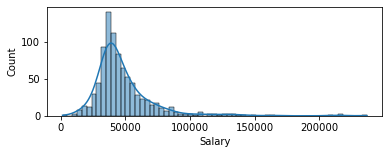

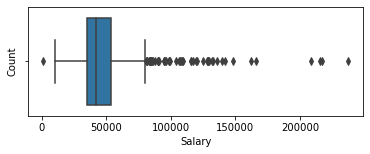

---------------------------------------------------------------------------------------------------


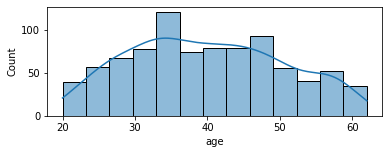

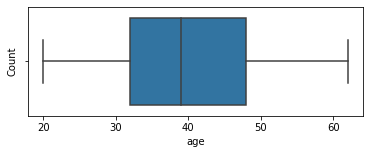

---------------------------------------------------------------------------------------------------


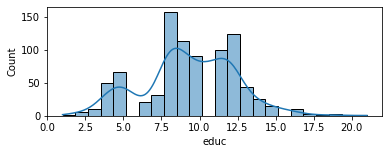

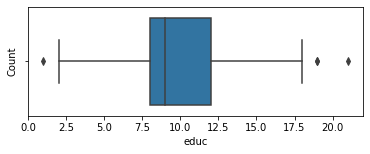

---------------------------------------------------------------------------------------------------


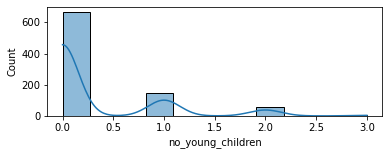

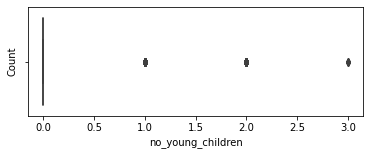

---------------------------------------------------------------------------------------------------


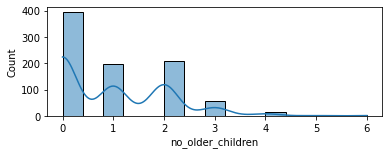

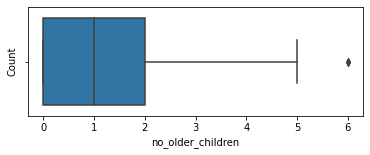

---------------------------------------------------------------------------------------------------


In [189]:
for i in data_num2.columns:
    plt.figure(figsize=(6,2))
    sns.histplot(data_num2[i],kde=True)
    plt.show()
    plt.figure(figsize=(6,2))
    sns.boxplot(x=i, data=data_num2)
    plt.ylabel('Count')
    plt.show()
    print('---------------------------------------------------------------------------------------------------')

Salary is normally distributed but having outliers.<br>
Age is in the range between 20-65.<br>
Education of the customer lies between the range 1 to 23.<br>
No_young_children is a discrete value, it is either 1, 2 or 3.<br>
Only one customer has 6 children older than 7 years.<br>

In [190]:
data_cat2 = df2.select_dtypes(['object'])

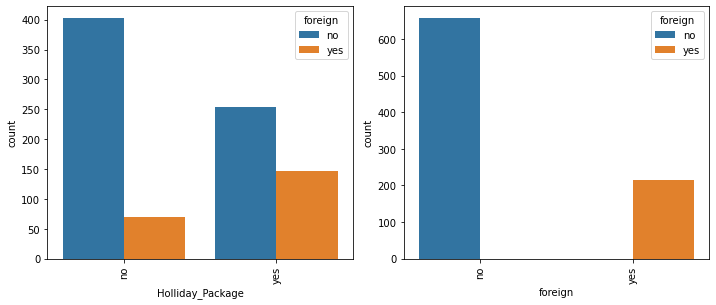

In [191]:
fig=plt.figure(figsize=(15,8))
for i in range(0,len(data_cat2.columns)):
    fig.add_subplot(2,3,i+1)
    sns.countplot(x=data_cat2.columns[i], data=data_cat2, hue='foreign');
    plt.xticks(rotation=90);
plt.tight_layout()
plt.show()

Most of the customers are not foreigners and are natives.<br>

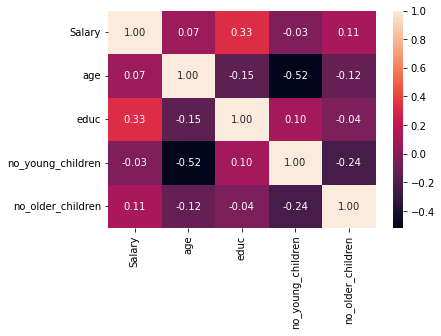

In [192]:
sns.heatmap(df2.corr(),annot=True,fmt='.2f');

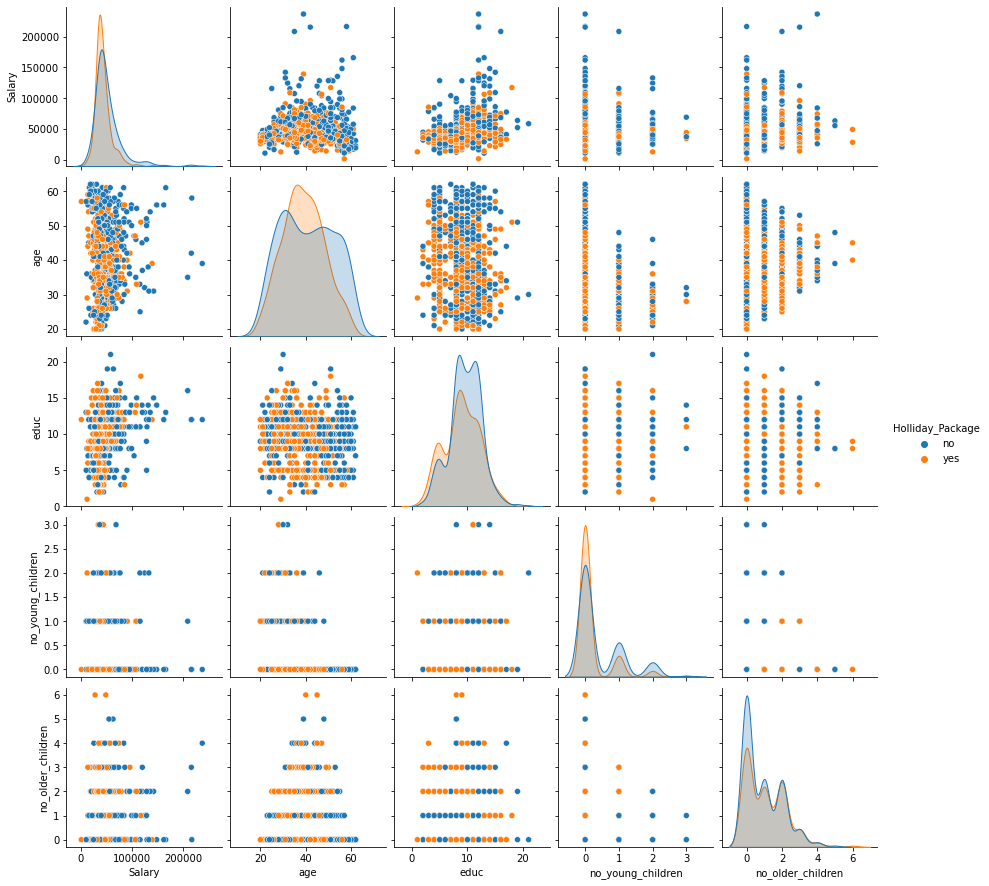

In [193]:
sns.pairplot(df2, hue='Holliday_Package');
plt.savefig('Pairplot2.jpeg');

We can notice that there is no high correlation between any of these factors.<br>
Few of the columns are discrete.<br>

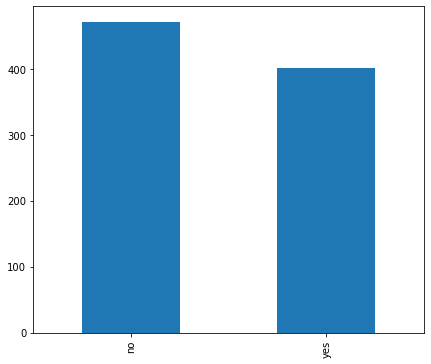

In [194]:
plt.figure(figsize=(7,6))
df2['Holliday_Package'].value_counts().plot(kind='bar')
plt.show()

<b>2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [195]:
df2 = pd.get_dummies(df2, columns=['foreign'],drop_first=True)
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,no,48412,30,8,1,1,0
1,yes,37207,45,8,0,1,0
2,no,58022,46,9,0,0,0
3,no,66503,31,11,2,0,0
4,no,66734,44,12,0,2,0


In [196]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [197]:
df2['Holliday_Package'] = LE.fit_transform(df2['Holliday_Package'])
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_yes
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [198]:
df2['foreign_yes'] = df2['foreign_yes'].astype('int64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int32
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign_yes        872 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 44.4 KB


All object types are converted to integer types<br>

In [199]:
x=df2.drop('Holliday_Package',axis=1)
y=df2.Holliday_Package

In [200]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x,y,random_state=1,test_size=0.3,stratify=df2['Holliday_Package'])

<b>Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(solver='newton-cg',max_iter=10000,verbose=True,n_jobs=2)
model2.fit(x_train2,y_train2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg', verbose=True)

In [202]:
ytrain_predict2=model2.predict(x_train2)
ytest_predict2=model2.predict(x_test2)

In [203]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [204]:
model_lg = LogisticRegression(max_iter=10000,n_jobs=2)

In [205]:
grid_search = GridSearchCV(estimator = model_lg, param_grid = grid, cv = 3,n_jobs=-1,scoring='recall')

In [206]:
grid_search.fit(x_train2, y_train2)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='recall')

In [207]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [208]:
best_model = grid_search.best_estimator_

In [209]:
ytrain_predict2_new=best_model.predict(x_train2)
ytest_predict2_new=best_model.predict(x_test2)

In [210]:
pred_prob_train=best_model.predict_proba(x_train2)
pred_prob_test=best_model.predict_proba(x_test2)

<b>LDA

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model3 = LinearDiscriminantAnalysis()
model3=model3.fit(x_train2,y_train2)
model3

LinearDiscriminantAnalysis()

In [212]:
ytrain_predict3=model3.predict(x_train2)
ytest_predict3=model3.predict(x_test2)

In [213]:
ytrain_predict3_new=model3.predict_proba(x_train2)
ytest_predict3_new=model3.predict_proba(x_test2)

<b>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [214]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

<b>Logistic Regression

0.1 

Accuracy Score 0.4852
Precision Score 0.4722
Recall Score 0.9964
F1 Score 0.6407
Confusion Matrix


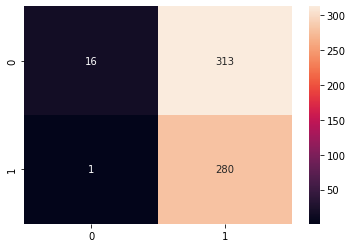

0.2 

Accuracy Score 0.518
Precision Score 0.4882
Recall Score 0.9573
F1 Score 0.6466
Confusion Matrix


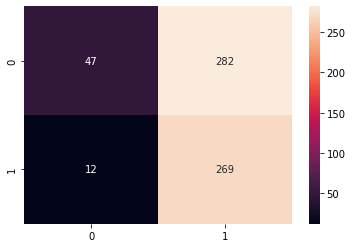

0.3 

Accuracy Score 0.5918
Precision Score 0.534
Recall Score 0.8932
F1 Score 0.6684
Confusion Matrix


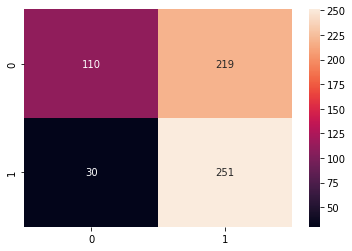

0.4 

Accuracy Score 0.6754
Precision Score 0.6196
Recall Score 0.7651
F1 Score 0.6847
Confusion Matrix


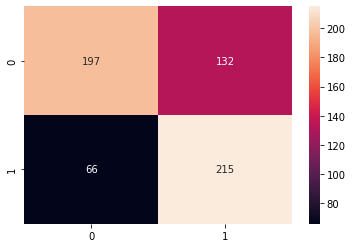

0.5 

Accuracy Score 0.6672
Precision Score 0.6573
Recall Score 0.5801
F1 Score 0.6163
Confusion Matrix


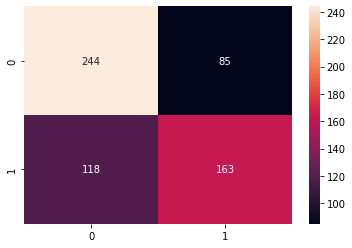

0.6 

Accuracy Score 0.659
Precision Score 0.7186
Recall Score 0.427
F1 Score 0.5357
Confusion Matrix


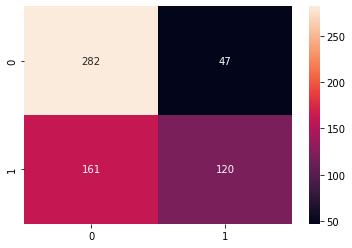

0.7 

Accuracy Score 0.6492
Precision Score 0.8454
Recall Score 0.2918
F1 Score 0.4339
Confusion Matrix


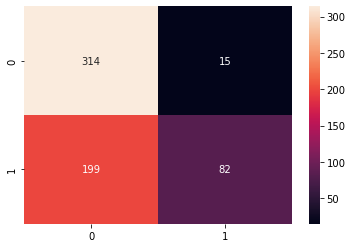

0.8 

Accuracy Score 0.5885
Precision Score 0.9688
Recall Score 0.1103
F1 Score 0.1981
Confusion Matrix


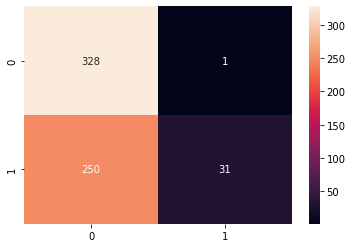

0.9 

Accuracy Score 0.5426
Precision Score 1.0
Recall Score 0.0071
F1 Score 0.0141
Confusion Matrix


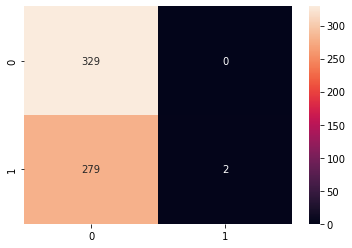

In [215]:
for j1 in np.arange(0.1,1,0.1):
    custom_prob1 = j1 
    custom_cutoff_data1=[]
    for i in range(0,len(y_train2)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob1:
            a=1
        else:
            a=0
        custom_cutoff_data1.append(a)
    print(round(j1,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train2,custom_cutoff_data1),4))
    print('Precision Score',round(metrics.precision_score(y_train2,custom_cutoff_data1),4))
    print('Recall Score',round(metrics.recall_score(y_train2,custom_cutoff_data1),4))
    print('F1 Score',round(metrics.f1_score(y_train2,custom_cutoff_data1),4))
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train2,custom_cutoff_data1),annot=True,fmt='.4g'),
    plt.show();

In [216]:
data_pred_custom_cutoff1=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff1.append(a)

Accuracy Score 0.5802
Precision Score 0.5234
Recall Score 0.9333
F1 Score 0.6707


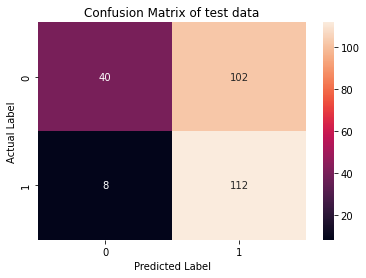

In [217]:
print('Accuracy Score',round(metrics.accuracy_score(y_test2,data_pred_custom_cutoff1),4))
print('Precision Score',round(metrics.precision_score(y_test2,data_pred_custom_cutoff1),4))
print('Recall Score',round(metrics.recall_score(y_test2,data_pred_custom_cutoff1),4))
print('F1 Score',round(metrics.f1_score(y_test2,data_pred_custom_cutoff1),4))
sns.heatmap(metrics.confusion_matrix(y_test2, data_pred_custom_cutoff1),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

ROC curves of Logistic Regression model
AUC for the Training Data: 0.735
AUC for the Test Data: 0.717


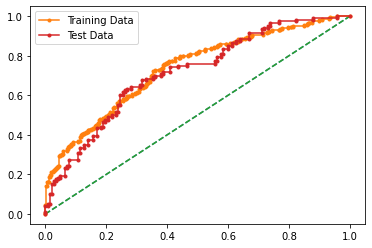

In [218]:
print('ROC curves of Logistic Regression model')
auc = metrics.roc_auc_score(y_train2,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_train2,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc = metrics.roc_auc_score(y_test2,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_test2,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

<b>LDA

0.1 

Accuracy Score 0.482
Precision Score 0.4706
Recall Score 0.9964
F1 Score 0.6393
Confusion Matrix


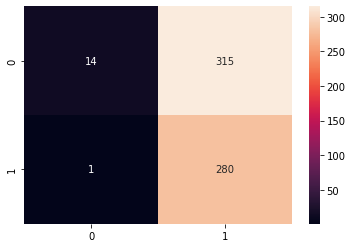

0.2 

Accuracy Score 0.5213
Precision Score 0.4901
Recall Score 0.9644
F1 Score 0.6499
Confusion Matrix


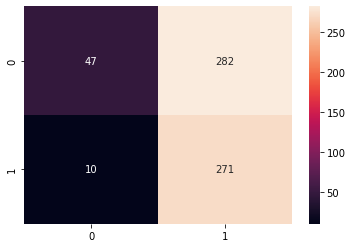

0.3 

Accuracy Score 0.5934
Precision Score 0.5352
Recall Score 0.8932
F1 Score 0.6693
Confusion Matrix


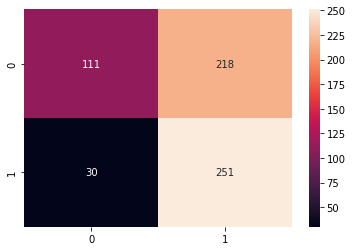

0.4 

Accuracy Score 0.6656
Precision Score 0.6103
Recall Score 0.758
F1 Score 0.6762
Confusion Matrix


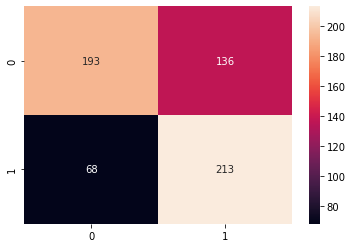

0.5 

Accuracy Score 0.6639
Precision Score 0.6532
Recall Score 0.5765
F1 Score 0.6125
Confusion Matrix


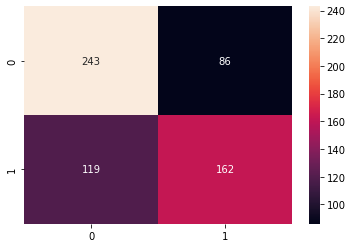

0.6 

Accuracy Score 0.659
Precision Score 0.7212
Recall Score 0.4235
F1 Score 0.5336
Confusion Matrix


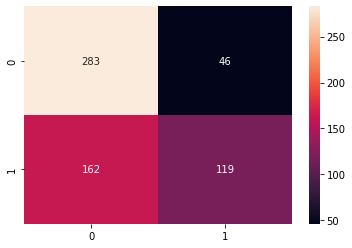

0.7 

Accuracy Score 0.6492
Precision Score 0.8317
Recall Score 0.2989
F1 Score 0.4398
Confusion Matrix


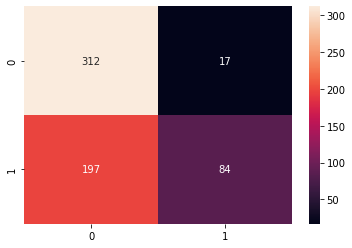

0.8 

Accuracy Score 0.5885
Precision Score 0.9688
Recall Score 0.1103
F1 Score 0.1981
Confusion Matrix


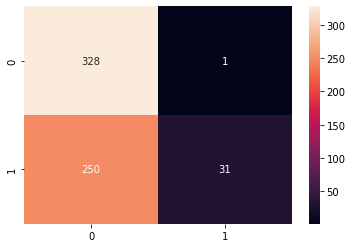

0.9 

Accuracy Score 0.5426
Precision Score 1.0
Recall Score 0.0071
F1 Score 0.0141
Confusion Matrix


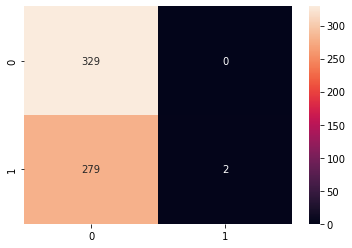

In [219]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(y_train2)):
        if np.array(ytrain_predict3_new[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train2,custom_cutoff_data),4))
    print('Precision Score',round(metrics.precision_score(y_train2,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(y_train2,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train2,custom_cutoff_data),4))
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train2,custom_cutoff_data),annot=True,fmt='.4g'),
    plt.show();

In [220]:
data_pred_custom_cutoff=[]
for i in range(0,len(ytest_predict3_new[:,1])):
    if np.array(ytest_predict3_new[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

Accuracy Score 0.5763
Precision Score 0.5217
Recall Score 0.9
F1 Score 0.6606


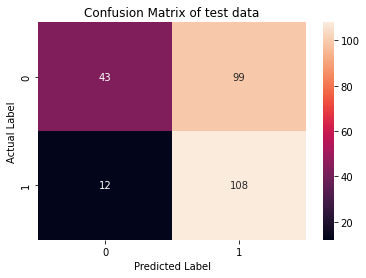

In [221]:
print('Accuracy Score',round(metrics.accuracy_score(y_test2,data_pred_custom_cutoff),4))
print('Precision Score',round(metrics.precision_score(y_test2,data_pred_custom_cutoff),4))
print('Recall Score',round(metrics.recall_score(y_test2,data_pred_custom_cutoff),4))
print('F1 Score',round(metrics.f1_score(y_test2,data_pred_custom_cutoff),4))
sns.heatmap(metrics.confusion_matrix(y_test2, data_pred_custom_cutoff),annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of test data')
plt.show()

ROC curves of LDA model
AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


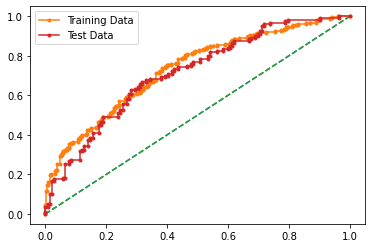

In [222]:
print('ROC curves of LDA model')
auc = metrics.roc_auc_score(y_train2,ytrain_predict3_new[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_train2,ytrain_predict3_new[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc = metrics.roc_auc_score(y_test2,ytest_predict3_new[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_test2,ytest_predict3_new[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [223]:
result=pd.DataFrame(columns=[['Train Accuracy', 'Test Accuracy', 'Train AUC', 'Test AUC', 'Train Precison', 'Test Precison', 'Train Recall', 'Test Recall', 'Train F1 score', 'Test F1 score']], 
                     index=['Logistic Regression', 'LDA'])

In [224]:
result.loc['Logistic Regression',:]=[accuracy_score(y_train2, ytrain_predict2_new).round(2),
                               accuracy_score(y_test2, data_pred_custom_cutoff1).round(2),
                               roc_auc_score(y_train2,pred_prob_train[:,1]).round(2),
                               roc_auc_score(y_test2,pred_prob_test[:,1]).round(2),
                               precision_score(y_train2,ytrain_predict2_new,pos_label=1).round(2), 
                               precision_score(y_test2,data_pred_custom_cutoff1,pos_label=1).round(2), 
                               recall_score(y_train2, ytrain_predict2_new, pos_label=1).round(2), 
                               recall_score(y_test2, data_pred_custom_cutoff1, pos_label=1).round(2), 
                               f1_score(y_train2, ytrain_predict2_new,pos_label=1).round(2), 
                               f1_score(y_test2, data_pred_custom_cutoff1, pos_label=1).round(2)
                              ]

In [225]:
result.loc['LDA',:]=[accuracy_score(y_train2, ytrain_predict3).round(2),
                               accuracy_score(y_test2, data_pred_custom_cutoff).round(2),
                               roc_auc_score(y_train2,ytrain_predict3_new[:,1]).round(2),
                               roc_auc_score(y_test2,ytest_predict3_new[:,1]).round(2),
                               precision_score(y_train2,ytrain_predict3,pos_label=1).round(2), 
                               precision_score(y_test2,data_pred_custom_cutoff,pos_label=1).round(2), 
                               recall_score(y_train2, ytrain_predict3, pos_label=1).round(2), 
                               recall_score(y_test2, data_pred_custom_cutoff, pos_label=1).round(2), 
                               f1_score(y_train2, ytrain_predict3,pos_label=1).round(2), 
                               f1_score(y_test2, data_pred_custom_cutoff, pos_label=1).round(2)
                              ]

In [226]:
result

,Train Accuracy,Test Accuracy,Train AUC,Test AUC,Train Precison,Test Precison,Train Recall,Test Recall,Train F1 score,Test F1 score
Logistic Regression,0.67,0.58,0.74,0.72,0.66,0.52,0.58,0.93,0.62,0.67
LDA,0.66,0.58,0.73,0.71,0.65,0.52,0.58,0.9,0.61,0.66
